# Lending Club Case Study
--------------------------
## Business Objective:
- Analyze the past customer data which defaulted the loan
- Identify the variables/columns which contributed to loan defaulters
- Conclude the analysis by providing the recommendations
    - i.e. Avoid/reduce lending loan to customers falling into above variables categories

------------------------

## Approach to solve the Problem
#### Data Sourcing
- Data is already provided for this study.
#### Data Understanding
- Identify and Report data quality issue
- Interpret the variable value and write in comment
#### Data Cleaning
- Fixing Rows & Columns
    - Delete summary/extra rows
    - Delete unidentified/null columns
- Fill missing values
- Convert incorrect data type
- Filtering
    - Delete columns that are irrevelant

### Univariate Analysis
Approach: Analyze single variable using:
- Summary Statistics
- Histograms
- Box plots
  - Remove outliers
- Density plot

### Segmented Univariate Analysis
Approach:
- Analyze single variable using:
    - Summary Statistics
    - Histograms
    - Box plots
        - Remove outliers
    - Density plot
 
### bivariate Analysis
Approach:
- Analyze single variable using:
    - Scatter plots
    - Correlation coefficient
    - Line plots

##### Import Libraries

In [608]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns=None
pd.options.display.max_rows=None

##### Import the lending club data

In [609]:
# Load the data with low memory to avoid multiple data type error
data = pd.read_csv('loan.csv', low_memory=False)

In [610]:
data.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [611]:
data.shape

(39717, 111)

## 1) Data Understanding

Yet to be filled

3.2 Univariate Analysis
Following fields will be checked as part of univariate analysis

1. Categorical variables
1. Ordered categorical data
    1. Grade (grade)
    2. Sub grade (sub_grade)
    3. Term (36 / 60 months) (term)
    4. Employment length (emp_length)
    5. Issue year (issue_y)
    6. Issue month (issue_m)
    7. Issue quarter (issue_q)

2. Unordered categorical data
    1. Address State (addr_state)
    2. Loan purpose (purpose)
    3. Home Ownership (home_ownership)
    4. Loan status (loan_status)
    5. Loan paid (loan_paid)
2. Quantitative variables
1. Interest rate bucket (int_rate_bucket)
2. Annual income bucket (annual_inc_bucket)
3. Loan amount bucket (loan_amnt_bucket)
4. Funded amount bucket (funded_amnt_bucket)
5. Debt to Income Ratio (DTI) bucket (dti_bucket)
6. Monthly Installment (installment)

## 2) Data Cleaning and Manipulation

In [612]:
# Check the columns with NULL values
data.isna().sum().sort_values()

id                                    0
earliest_cr_line                      0
inq_last_6mths                        0
open_acc                              0
pub_rec                               0
revol_bal                             0
total_acc                             0
initial_list_status                   0
out_prncp                             0
out_prncp_inv                         0
delinq_2yrs                           0
total_pymnt                           0
total_rec_int                         0
total_rec_late_fee                    0
recoveries                            0
collection_recovery_fee               0
last_pymnt_amnt                       0
policy_code                           0
application_type                      0
acc_now_delinq                        0
delinq_amnt                           0
total_pymnt_inv                       0
dti                                   0
total_rec_prncp                       0
zip_code                              0


In [613]:
# Remove the columns with NULL values
data.dropna(axis = 1, how = 'all', inplace = True)

In [614]:
# Removing columns which have >70% NULL values and imputing values can lead to data abnormality. 
data.drop(['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc'], axis = 1, inplace = True)

In [615]:
data.shape

(39717, 53)

In [616]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [617]:
# Analyze column further to check the column data variability
# Since constant values columns will not br helpful in our analysis
data.nunique().sort_values().head(20)

tax_liens                      1
delinq_amnt                    1
chargeoff_within_12_mths       1
acc_now_delinq                 1
application_type               1
policy_code                    1
collections_12_mths_ex_med     1
initial_list_status            1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
verification_status            3
loan_status                    3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
dtype: int64

In [618]:
# Seems there are constant value columns and these columns type are not adding values into our analysis.
# Removing these columns
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'pymnt_plan', 'initial_list_status'], axis = 1, inplace = True)

In [619]:
data.shape

(39717, 44)

In [620]:
data.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'pub_rec_bankruptcies']

### Analyzing these 44 columns in the provided "Data Dictionary sheet" to understand if we can further drop more columns to reduce the data frame size
Found that following columns can also be dropped as they are mostly Descriptive, Dealing with Payments, Fees, Recoveries and Bankruptcy and don't play important role in the problem we are solving.
- Borrowers Personal Details related columns: `emp_title, title`
- Site URL: `url`
- Outstanding principal: `out_prncp, out_prncp_inv`
- Payment/Fees Received related columns: `total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee`
- Recoveries and last payment received related columns: `recoveries, collection_recovery_fee`
- Last/Next Payment received date/amount: `last_pymnt_d, last_pymnt_amnt, last_credit_pull_d`

In [621]:
data.drop(['emp_title', 'title',
           'url',
           'out_prncp','out_prncp_inv',
           'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
           'recoveries', 'collection_recovery_fee',
           'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'
          ], axis=1, inplace=True
         )

In [622]:
data.shape

(39717, 29)

In [623]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,0.0


## Fill Missing values
### Approach
- For Continuous data - Median/Mode/Mean whichever is appropriate
- For Categorical data - Use frequency to fill most frequent value

In [624]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_length            38642 non-null  object 
 11  home_ownership        39717 non-null  object 
 12  annual_inc            39717 non-null  float64
 13  verification_status   39717 non-null  object 
 14  issue_d               39717 non-null  object 
 15  loan_status        

##### As we can see from the above output, the following column rows needs to be filled or dropped
- Rows to be filled for: __emp_length__
- Rows to be dropped for: __revol_util, pub_rec_bankruptcies __

In [625]:
data.emp_length.value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [626]:
data.emp_length.mode()

0    10+ years
Name: emp_length, dtype: object

In [627]:
print(data.emp_length.index)
print(len(data.emp_length))
print(data.emp_length.isna().sum())

RangeIndex(start=0, stop=39717, step=1)
39717
1075


In [628]:
mode_value = data.emp_length.mode()[0]
data.emp_length.fillna(mode_value, inplace=True)

In [629]:
data['emp_length'].isna().sum()

0

In [630]:
data.dropna(axis = 0, subset=['revol_util', 'pub_rec_bankruptcies'], inplace=True)

In [631]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38970 entries, 0 to 39680
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38970 non-null  int64  
 1   member_id             38970 non-null  int64  
 2   loan_amnt             38970 non-null  int64  
 3   funded_amnt           38970 non-null  int64  
 4   funded_amnt_inv       38970 non-null  float64
 5   term                  38970 non-null  object 
 6   int_rate              38970 non-null  object 
 7   installment           38970 non-null  float64
 8   grade                 38970 non-null  object 
 9   sub_grade             38970 non-null  object 
 10  emp_length            38970 non-null  object 
 11  home_ownership        38970 non-null  object 
 12  annual_inc            38970 non-null  float64
 13  verification_status   38970 non-null  object 
 14  issue_d               38970 non-null  object 
 15  loan_status           38

### Standardizing values
Approach:
- Fixing unwanted characters/spaces in the variable value, if any
- Data type conversion

Check & Fix column - `term`

In [632]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [633]:
## Removing unwanted spaces from term variable
data['term'] = data['term'].str.strip()

Check & Fix column - `int_rate`

In [634]:
data['int_rate'].unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

In [635]:
## int_rate have % character. Removing it.
## It can also be converted into floating point integer
data['int_rate'] = data['int_rate'].str.strip('%').astype(float)

Check & Fix column - `revol_util`

In [636]:
data['revol_util'].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [637]:
## revol_util have % character. Removing it.
## It can also be converted into floating point integer
data['revol_util'] = data['revol_util'].str.strip('%').astype(float)

Check & Fix column - `grade`, `sub_grade`, `emp_length`, `home_ownership`, `verification_status`, `loan_status`, `purpose`, `zip_code`, `addr_state`

No changes are required in any of the mentioned column here. Please see below. <br>
NOTE: `emp_length` column have characters like `+` and `<` which we can't replace with exact value

In [638]:
## No changes are required for any of the following column
data['grade'].unique()
data['sub_grade'].unique()
data['emp_length'].unique()
data['home_ownership'].unique()
data['verification_status'].unique()
data['loan_status'].unique()
data['purpose'].unique()
data['zip_code'].unique()
data['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN'], dtype=object)

Check & Fix column - `issue_d` and `earliest_cr_line`

NOTE:
- These are date-year value column. We can convert them to datetime format
- Later, we can also Derive columns from it.

In [639]:
data['issue_d'].unique()

# data['earliest_cr_line'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Aug-07'], dtype=object)

In [640]:
## Convert to Date time datatype
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y', errors='coerce')
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y', errors='coerce')

In [641]:
## Display value post conversion
data['issue_d'].describe()
data['earliest_cr_line'].describe()

count                            38970
mean     1997-04-17 16:32:44.341801344
min                1969-02-01 00:00:00
25%                1993-12-01 00:00:00
50%                1998-06-01 00:00:00
75%                2001-09-01 00:00:00
max                2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object

### Calculate Derived Metrics
Approach:
- Derive Year and month from `issue_d` and `earliest_cr_line` columns
- Make groups in `loan_amnt` and `funded_amnt_inv` as the values are verying a lot

In [642]:
## Type Driven variable are created from issue_d and earliest_cr_line columns
data['issue_d_month'] = data['issue_d'].dt.month
data['issue_d_year'] = data['issue_d'].dt.year
data['earliest_cr_line_month'] = data['earliest_cr_line'].dt.month
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year

## Loan Amout and Funded Amount data needs to be convered into groups for better analysis
data['loan_amnt_groups'] = pd.cut(data['loan_amnt'], precision=0, bins=7, labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
data['funded_amnt_inv_group'] = pd.cut(data['funded_amnt_inv'], precision=0, bins=7, labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

### Data Filtering
"Charged Off" and "Fully Paid" data is required for our analysis and dropping rows with Loan status "Current" as they aren't participating in defaulters list.

In [643]:
filtered_data = data[data['loan_status'] != 'Current']
filtered_data.shape

(37830, 35)

In [644]:
## Resetting the data Frame index before analyzing data using charts
filtered_data.reset_index(drop=True, inplace=True)
filtered_data.index

RangeIndex(start=0, stop=37830, step=1)

--------------------------------------------

## 3) Data analysis
### Univariate Analysis
**Approach:**
- Analyzing variable one at a time with distribution and Summary Metrics charts

### `Analysing Loan Amount`
Loan applied for by the borrower.


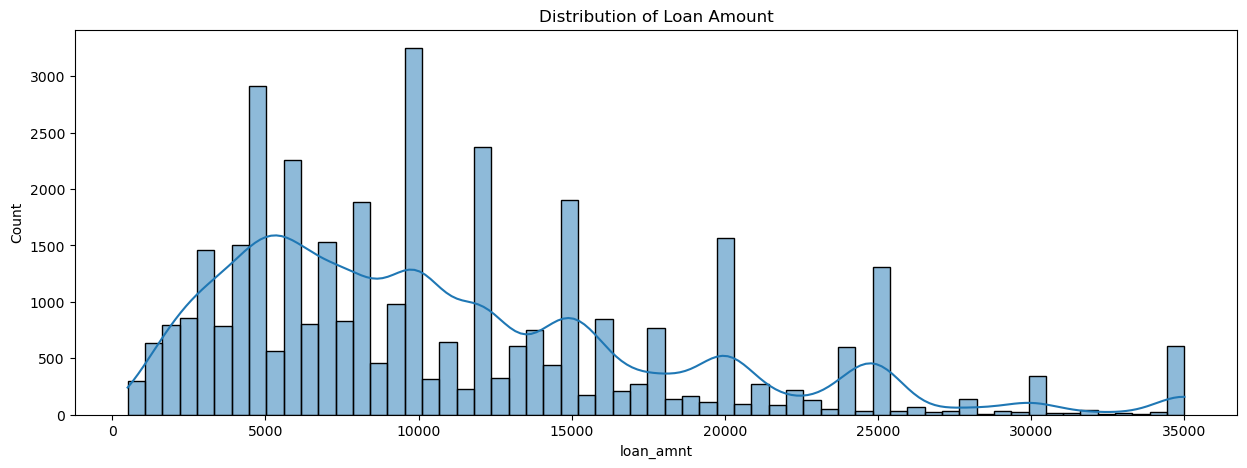

In [645]:
## Distribution plot
plt.figure(figsize=(15,5))
sns.histplot(filtered_data['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amount')
plt.show()



In [646]:
## Checking percentile for loan applied
filtered_data['loan_amnt'].describe()

count    37830.000000
mean     11075.510838
std       7364.004300
min        500.000000
25%       5400.000000
50%       9750.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

##### Observations:
Many people applied for loan amount 10000. Also, median value is 9600 indicating the distribution of applied loan amount.
Very few people applied for higher amount (25000 - 35000) loan.

## `Analysing Funded Amount`


The total amount committed to that loan at that point in time.

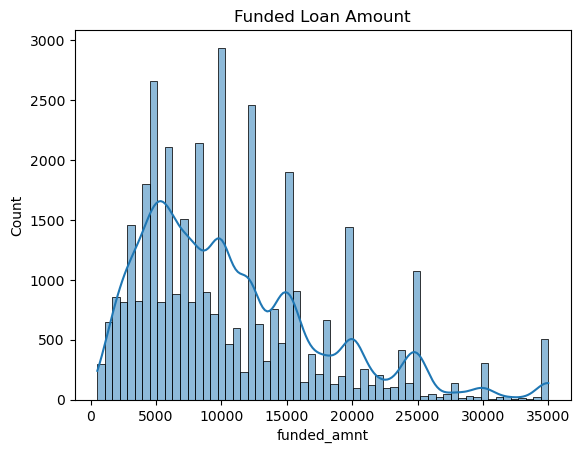

In [647]:
## Distribution plot
sns.histplot(filtered_data['funded_amnt'], kde=True)
plt.title('Funded Loan Amount')
plt.show()

In [648]:
filtered_data['funded_amnt'].describe()

count    37830.000000
mean     10809.682791
std       7102.993903
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

##### Observations:
Funded amount distribution is very close the applied loan distribution. Median is also 9600.
This is indicating that applied loan amount are mostly approved by lender for the same amount.

## `Analysing Funded Amount By Investors`


The total amount committed by investors for that loan at that point in time.

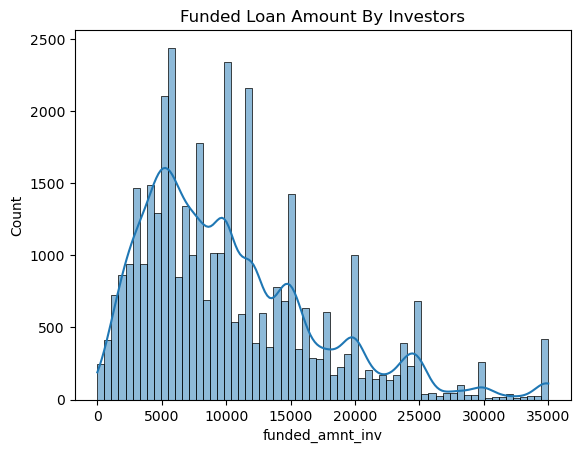

In [649]:
sns.histplot(filtered_data['funded_amnt_inv'], kde=True)
plt.title('Funded Loan Amount By Investors')
plt.show()

In [650]:
filtered_data['funded_amnt_inv'].describe()

count    37830.000000
mean     10376.036938
std       6998.968678
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14224.776935
max      35000.000000
Name: funded_amnt_inv, dtype: float64

##### Observations:
Funded amount committed by investors are very close to loan amount applied by the borrower but lesser then the applied amount.

## `Analysing Interest Rates`

Interest Rate on the loan


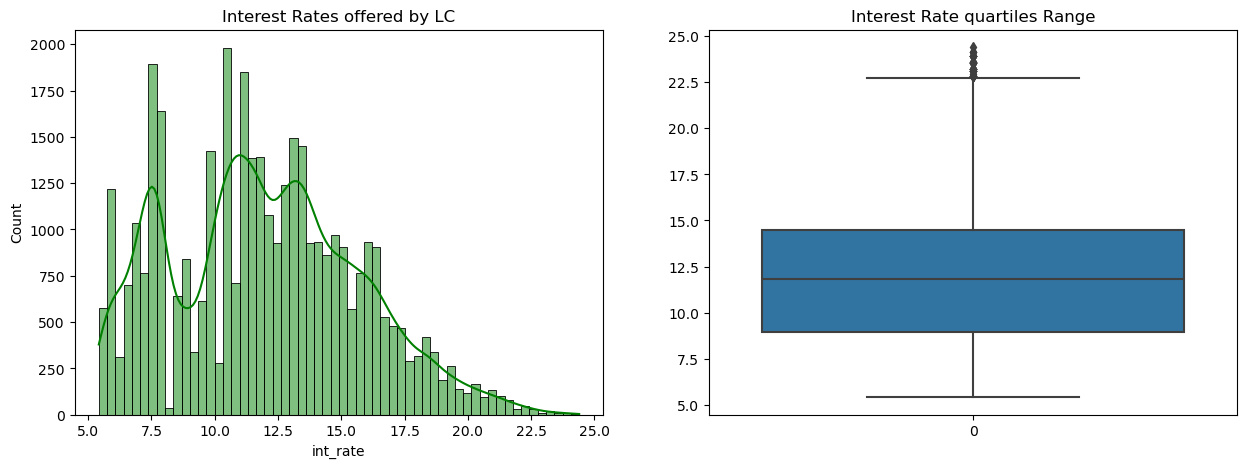

In [651]:
# Lets plot 2 charts - 1 IntRate distribution and another Box plot to analyze the interest rate quartiles
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(filtered_data['int_rate'], kde=True, color='green')
plt.title('Interest Rates offered by LC')
plt.subplot(1,2,2)
sns.boxplot(filtered_data['int_rate'])
plt.title('Interest Rate quartiles Range')
plt.show()

##### Observations:
For defaulters, ranges of Interest rates offerred by LC are:
- Most loans were offered at an interest rate between : 9% to 14.5%
- Some loans were offered at lower interest rate      : <9%
- Few  loans were offered at higher interest rate     : 22.5%

 ## `Analysing Annual Income`

The self-reported annual income provided by the borrower during registration.


Text(0.5, 1.0, 'Annual income box plot')

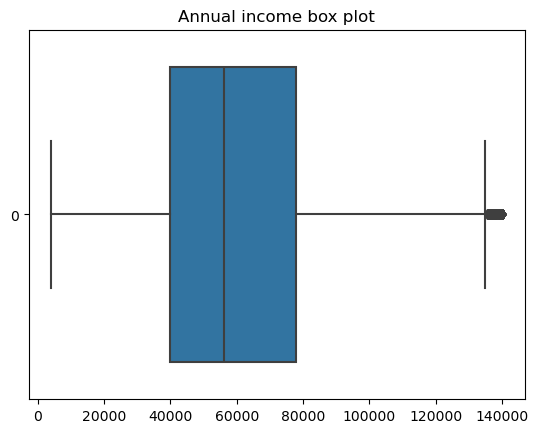

In [680]:
sns.boxplot(filtered_data['annual_inc'], orient='h', )
plt.title("Annual income box plot")

In [653]:
filtered_data['annual_inc'].describe()

count    3.783000e+04
mean     6.879568e+04
std      6.356907e+04
min      4.000000e+03
25%      4.013709e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [655]:
print(filtered_data['annual_inc'].median())
filtered_data['annual_inc'].quantile([0.5,0.9,0.95,0.97,0.98, 0.99])

59000.0


0.50     59000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    186000.0
0.99    234000.0
Name: annual_inc, dtype: float64

**Observation:**
- Mean is not indicatoing the right metric due to the presence of the outlier
- Meadian is the right metric to pick to understand the data distribution.

In [656]:
## Looking at the above data, meadian is 59000 and there are huge increase in values from 90 to 95%.
## It's safe to drop values above 0.95 quantiles

annual_inc_95 = filtered_data['annual_inc'].quantile(0.95)
filtered_data = filtered_data[filtered_data['annual_inc'] <= annual_inc_95]

Text(0.5, 1.0, 'Annual Income Distribution')

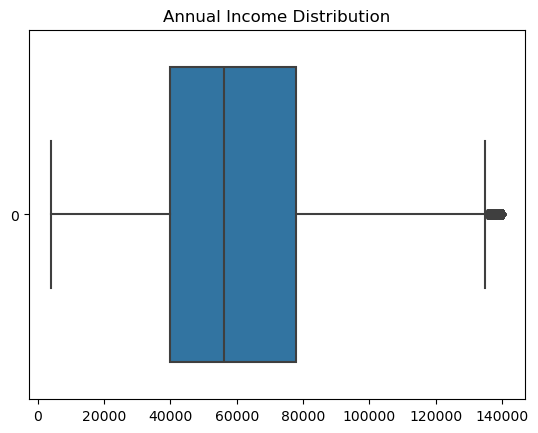

In [682]:
sns.boxplot(filtered_data['annual_inc'], orient='h', )
plt.title("Annual Income Distribution")

**Observation**:
- Now the annual Income boxplot looks much better after removing the outliers.

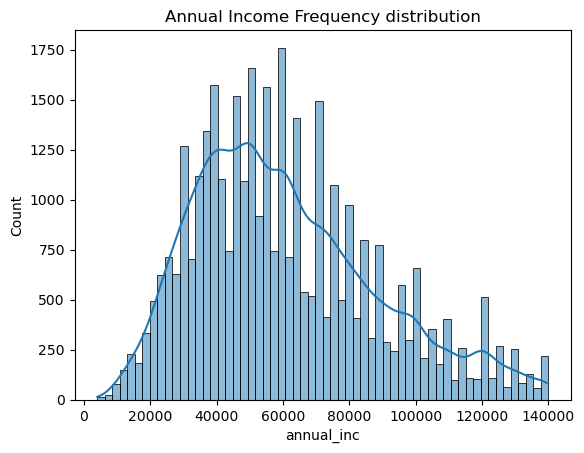

In [683]:
sns.histplot(filtered_data['annual_inc'], kde=True)
plt.title("Annual Income Frequency distribution")
plt.show()

##### Observations:

- This is giving us insight about the borrowers annual income ranges.

 ## `Analysing Grades`

LC assigned loan grade


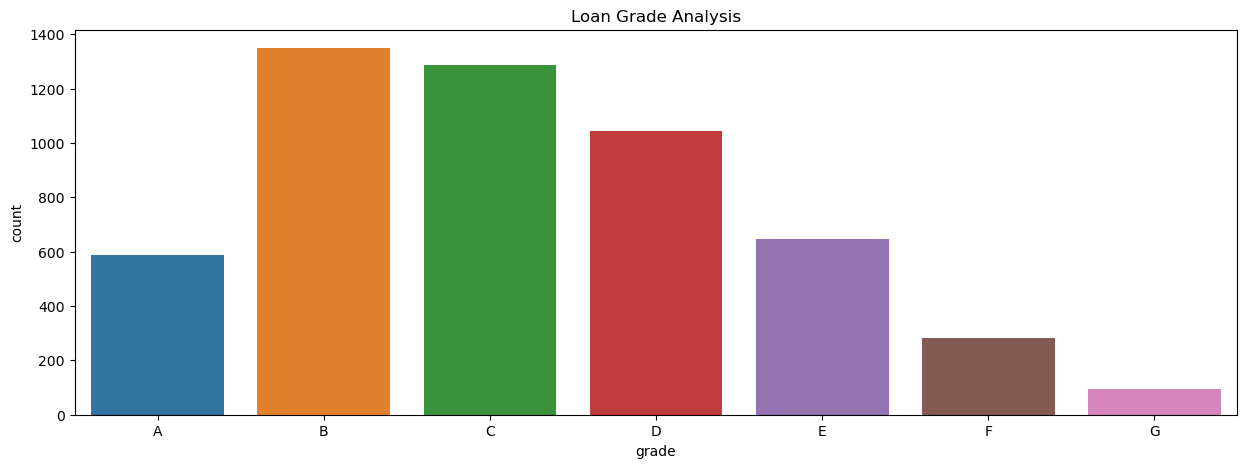

In [684]:
plt.figure(figsize=(15,5))
sns.countplot(x='grade', data=filtered_data[filtered_data['loan_status']=='Charged Off'], order=['A','B','C','D','E','F','G'])
plt.title("Loan Grade Analysis")
plt.show()

##### Observations:
- Grade B, C, and D have defaulte the most in a Univariate analysis

 ## `Analysing Sub-Grades`

LC assigned loan subgrade


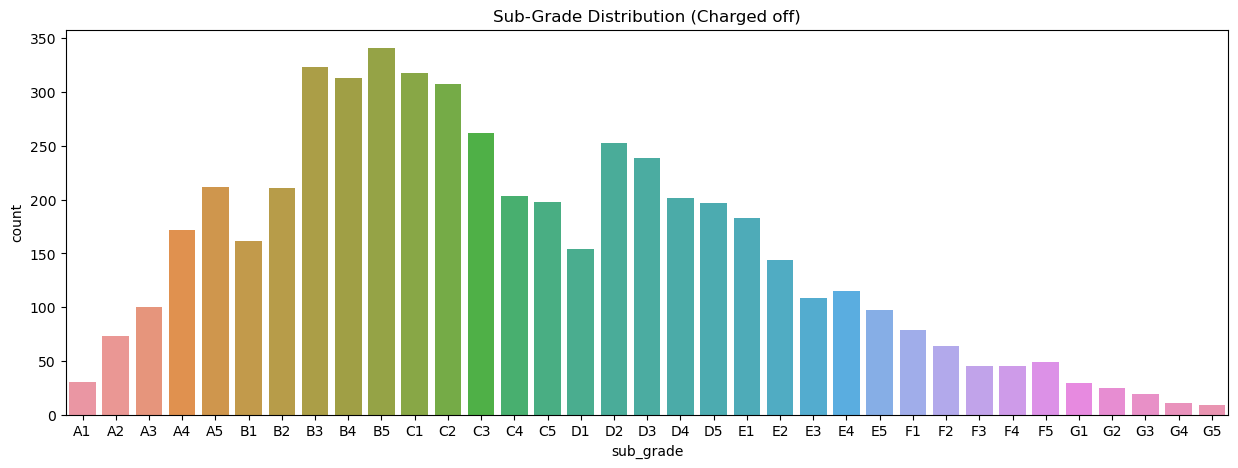

In [688]:
## Filtering the unique sub-grades
keys = filtered_data['sub_grade'].value_counts().to_dict().keys()
## Plotting the chart
plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade', data=filtered_data[filtered_data['loan_status']=='Charged Off'], order=sorted(keys))
plt.title("Sub-Grade Distribution (Charged off)")
plt.show()

**Observations:**
- Sub-categories B3, B4, B5, C1, C2, C3, D2, D3, D4, and D5 are the most defaulters

 ## `Analysing Employment Length`

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


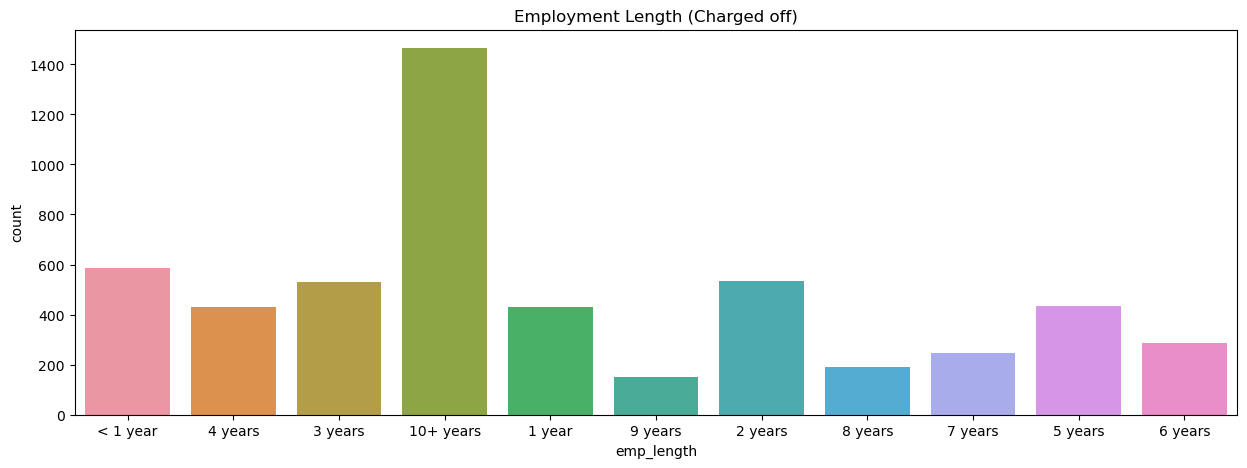

In [689]:
plt.figure(figsize=(15,5))
sns.countplot(x='emp_length', data=filtered_data[filtered_data['loan_status']=='Charged Off'])
plt.title("Employment Length (Charged off)")
plt.show()

**Observations:**
- It's strongly indicating that **10+ years** of experience borrowers are the most defaulters

 ## `Analysing Home Ownership`

The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.


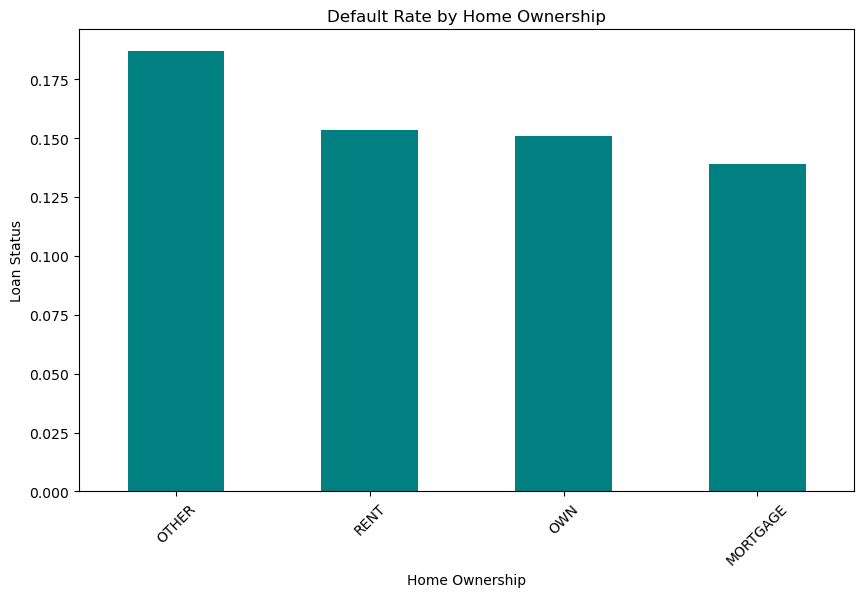

In [690]:
home_ownership_default_rate = filtered_data.groupby('home_ownership')['loan_status'].apply(lambda x: (x == 'Charged Off').mean())
home_ownership_default_rate.sort_values(ascending=False).plot(kind='bar', color='teal', figsize=(10, 6))
plt.title("Default Rate by Home Ownership")
plt.ylabel("Loan Status")
plt.xlabel("Home Ownership")
plt.xticks(rotation=45)
plt.show()

**Observations:**
- Borrowers who didn't provide the Home ownership while applying for loan, are the most defaulters.

 ## `Analysing Verification Status`

Indicates if income was verified by LC, not verified, or if the income source was verified


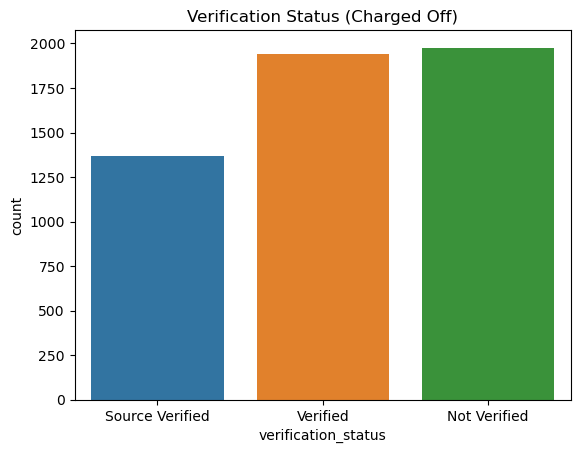

In [692]:
sns.countplot(x='verification_status', data=filtered_data[filtered_data['loan_status']=='Charged Off'])
plt.title("Verification Status (Charged Off)")
plt.show()

**Observations:**
- It is NOT clear by this univariate analysis whether a Verified or Not Verified borrower will default the loan payment.

 ## `Analysing Issued Date`

The month which the loan was funded

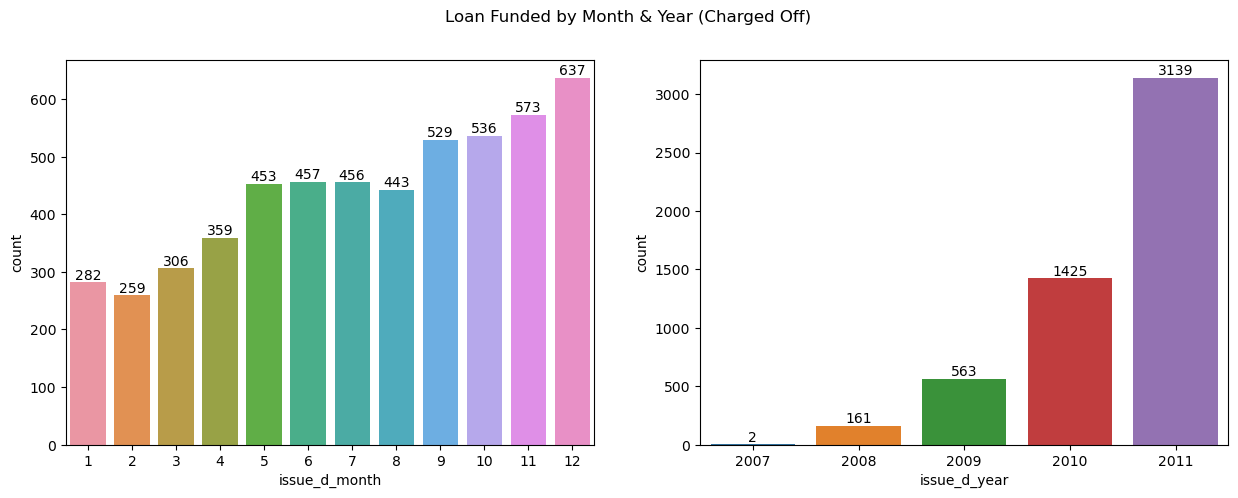

In [693]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
p1 = sns.countplot(x='issue_d_month', data=filtered_data[filtered_data['loan_status']=='Charged Off'], )
p1.bar_label(p1.containers[0])
plt.subplot(1,2,2)
p2 = sns.countplot(x='issue_d_year', data=filtered_data[filtered_data['loan_status']=='Charged Off'])
p2.bar_label(p2.containers[0])
plt.suptitle('Loan Funded by Month & Year (Charged Off)')
plt.show()

**Observations:**
- Trend of issuing loan that are defaulted have grown significantly from 2007 - 2011.
- 4th Quarter of any year is where most of the loans (Charged off) were funded in LC.

 ## `Analysing Loan Status`

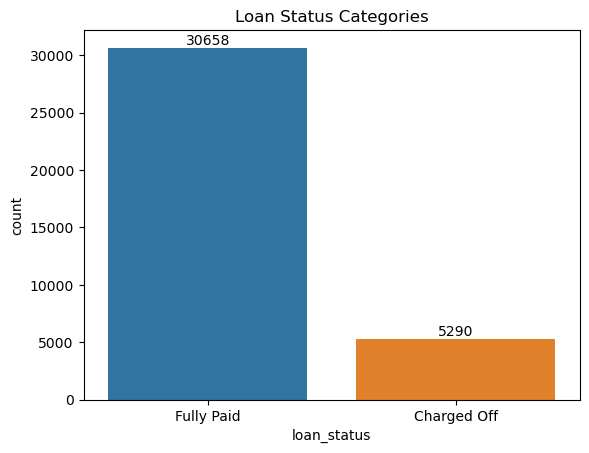

In [694]:
plot = sns.countplot(x='loan_status', data=filtered_data)
plot.bar_label(plot.containers[0])
plt.title('Loan Status Categories')
plt.show()

**Observations:**
- Out of all the loans offerred, ~30K were Fully Paid and ~5K were defaulted

 ## `Analysing Purpose`

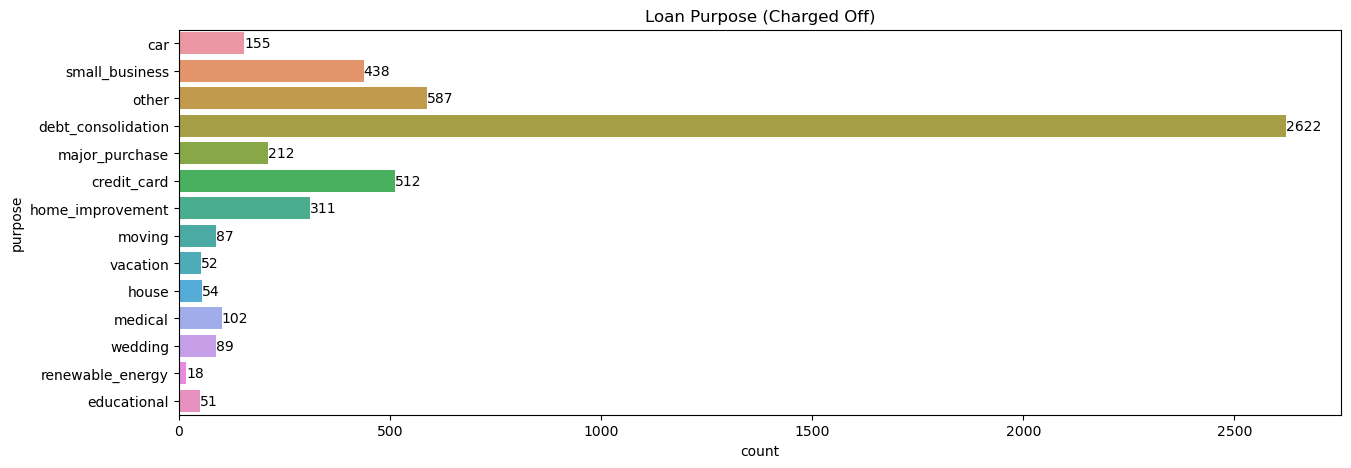

In [695]:
plt.figure(figsize=(15,5))
plot = sns.countplot(y='purpose', data=filtered_data[filtered_data['loan_status'] == 'Charged Off'])
plot.bar_label(plot.containers[0])
# plt.xticks(rotation=70)
plt.title('Loan Purpose (Charged Off)')
plt.show()

**Observations:**
- Debt consolidation is the MAJOR reason provided for taking the loan and borrower defaulting it

 ## `Analysing Address State`

The state provided by the borrower in the loan application



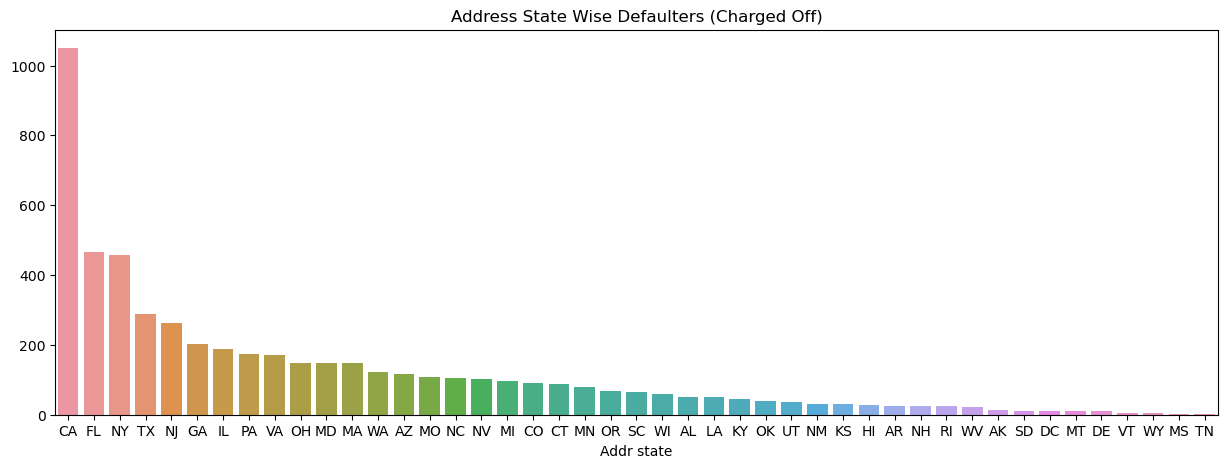

In [696]:
# Renaming x- and y-labels as well.
plt.figure(figsize=(15,5))
sub_data = filtered_data[filtered_data['loan_status'] == 'Charged Off']
result = sub_data['addr_state'].value_counts().rename_axis('Addr state').rename('count')
plot = sns.barplot(x=result.index, y=result.values, order=result.index)
plt.title('Address State Wise Defaulters (Charged Off)')
plt.show()

**Observations:**
- Most Borrowers are from status **CA, NY, and FL** who defaulted repaying the loan.

 ## `Analysing Debt To Income (dti)`

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
| DTI Range  | Indication  |
| :-------- | :--------    |
| <20%      | Excellent financial position |
| 20% – 35% | Good, and most lenders consider you a low-risk borrower |
| 36% – 40% | Fair, and lenders may need to review other credit factors |
| >40%      | High risk, and it may be difficult to get loan approval |aloval


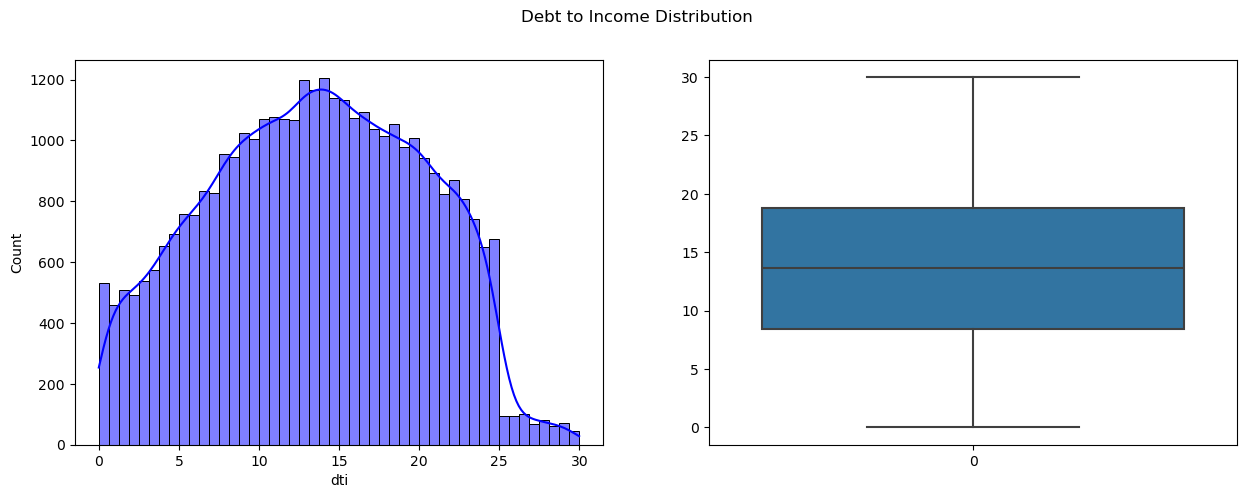

In [701]:
plt.figure(figsize=(15,5))
plt.suptitle('Debt to Income Distribution')
plt.subplot(121)
sns.histplot(filtered_data['dti'], kde=True, color='blue')
plt.subplot(122)
sns.boxplot(filtered_data['dti'])
plt.show()

**Observations:**
- DTI ratio is <30% which is a good indicator and borrowers are not considered Risky to Lend the money.
- So, it seems there are other factors/variables which needs to be analyzed for loan Charged off analysis

 ## `Analysing Open Account`

The number of open credit lines in the borrower's credit file.


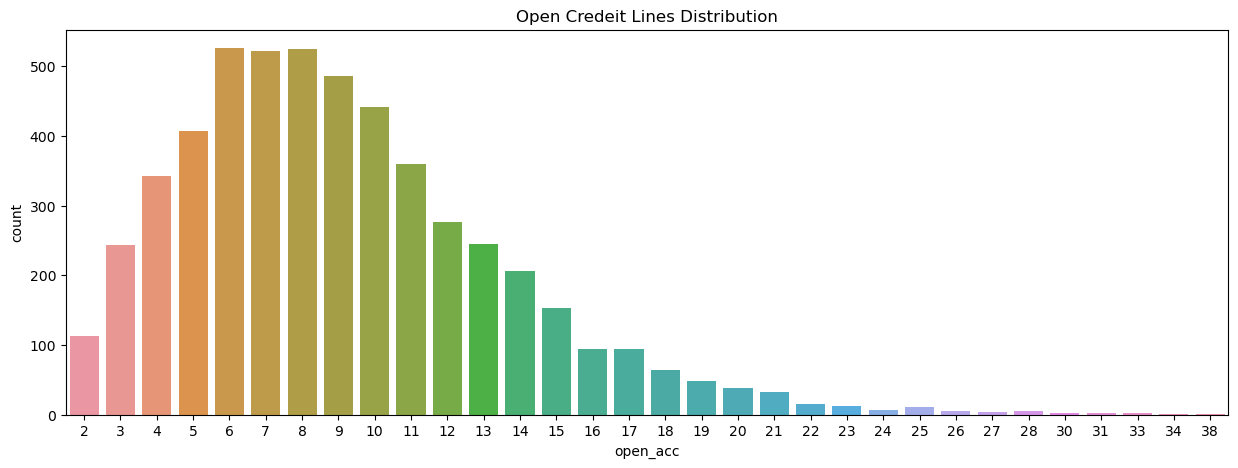

In [702]:
plt.figure(figsize=(15,5))
sns.countplot(x='open_acc', data=filtered_data[filtered_data['loan_status']=='Charged Off'])
plt.title('Open Credeit Lines Distribution')
plt.show()

 ## `Analysing Total Account`

The total number of credit lines currently in the borrower's credit file


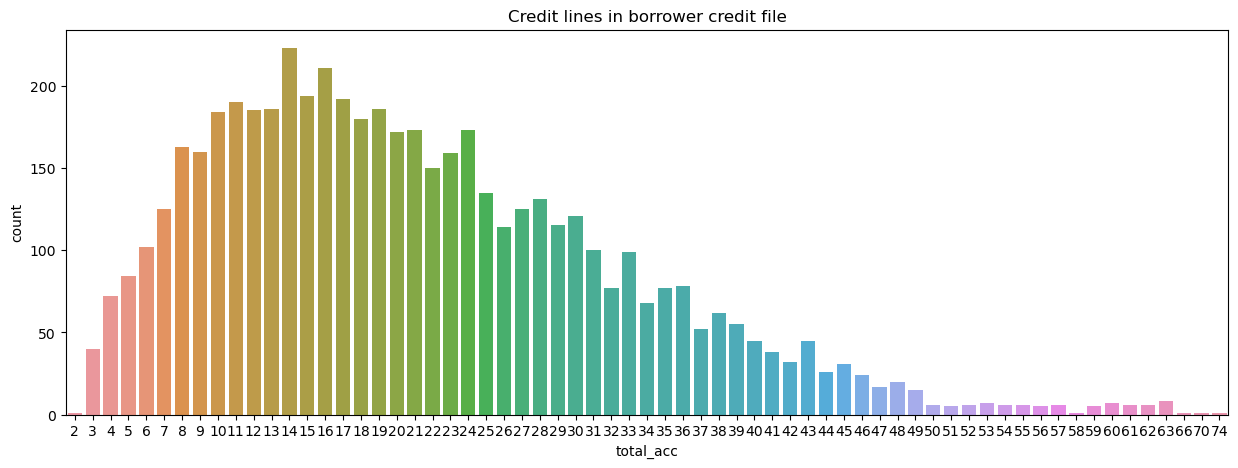

In [704]:
plt.figure(figsize=(15,5))
sns.countplot(x='total_acc', data=filtered_data[filtered_data['loan_status']=='Charged Off'])
plt.title('Credit lines in borrower credit file')
plt.show()

 ## `Analysing Public Record`

Number of derogatory public records


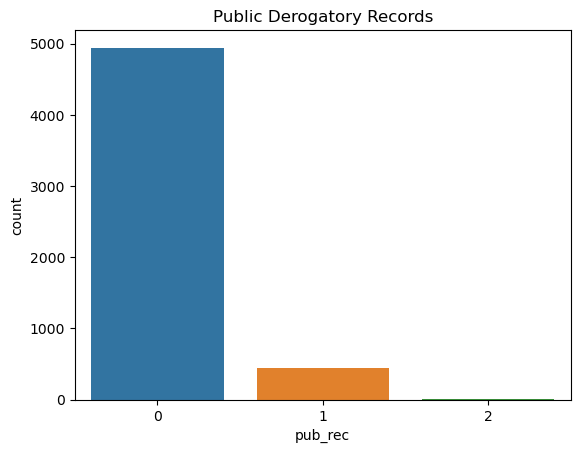

In [504]:
plt.title('Public Derogatory Records')
sns.countplot(x='pub_rec', data=filtered_data[filtered_data['loan_status']=='Charged Off'])
plt.show()

**Observstion**:
- Borrowers with No Public Derogatory records are the most defaulters

---------------------------------------------------

### Segmented Univariate Analysis

## `Analysing Loan Amount`

A category provided by the borrower for the loan request. 


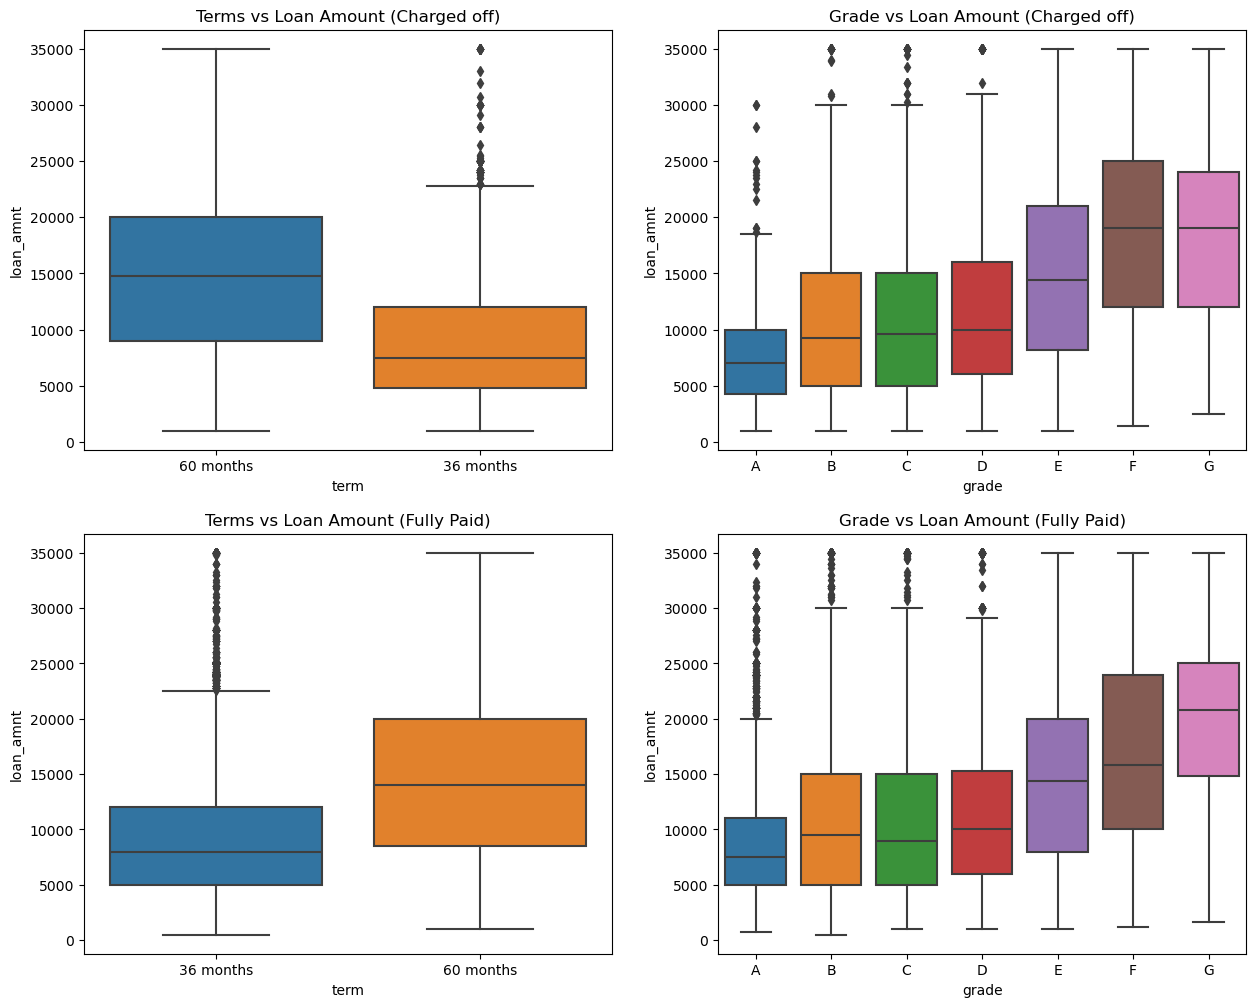

In [705]:
## Term - Charged Off
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.boxplot(x='term', y=filtered_data['loan_amnt'], data=filtered_data[filtered_data['loan_status']=='Charged Off'])
plt.title('Terms vs Loan Amount (Charged off)')

## Grade - Charged Off
plt.subplot(222)
uniq_grades = filtered_data['grade'].unique()
uniq_grades.sort()
sns.boxplot(x='grade', y=filtered_data['loan_amnt'], order = uniq_grades, data=filtered_data[filtered_data['loan_status']=='Charged Off'])
plt.title('Grade vs Loan Amount (Charged off)')

## Term - Fully Paid
plt.subplot(223)
sns.boxplot(x='term', y=filtered_data['loan_amnt'], data=filtered_data[filtered_data['loan_status']=='Fully Paid'])
plt.title('Terms vs Loan Amount (Fully Paid)')

## Grade - Fully Paid
plt.subplot(224)
uniq_grades = filtered_data['grade'].unique()
uniq_grades.sort()
sns.boxplot(x='grade', y=filtered_data['loan_amnt'], order = uniq_grades, data=filtered_data[filtered_data['loan_status']=='Fully Paid'])
plt.title('Grade vs Loan Amount (Fully Paid)')
plt.show()

**Observtions:**
- Higher amount loans are taken for longer term
- Grades are inversely proportion to loan amount. Grade F and G had taken the large amount loans

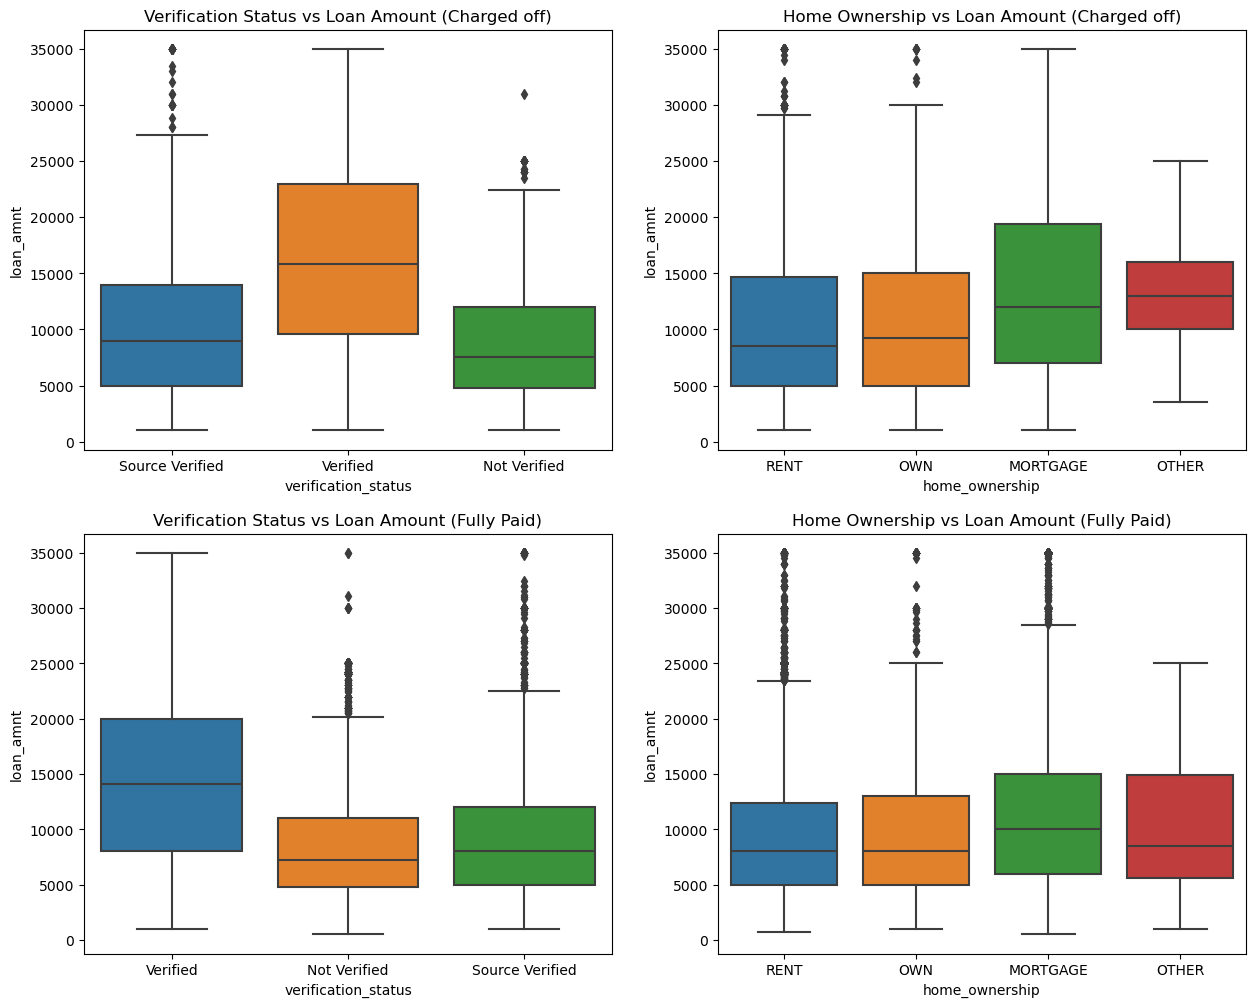

In [706]:
## Verification Status - Charged Off
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.boxplot(x='verification_status', y=filtered_data['loan_amnt'], data=filtered_data[filtered_data['loan_status']=='Charged Off'])
plt.title('Verification Status vs Loan Amount (Charged off)')

## Home Ownership - Charged Off
plt.subplot(222)
sns.boxplot(x='home_ownership', y=filtered_data['loan_amnt'], data=filtered_data[filtered_data['loan_status']=='Charged Off'])
plt.title('Home Ownership vs Loan Amount (Charged off)')

## Term - Fully Paid
plt.subplot(223)
sns.boxplot(x='verification_status', y=filtered_data['loan_amnt'], data=filtered_data[filtered_data['loan_status']=='Fully Paid'])
plt.title('Verification Status vs Loan Amount (Fully Paid)')

## Grade - Fully Paid
plt.subplot(224)
sns.boxplot(x='home_ownership', y=filtered_data['loan_amnt'], data=filtered_data[filtered_data['loan_status']=='Fully Paid'])
plt.title('Home Ownership vs Loan Amount (Fully Paid)')
plt.show()

**Observation:**
- Verification status is not a indication of the defaulters are is Verified category whereas Fully paid are also in Verified category

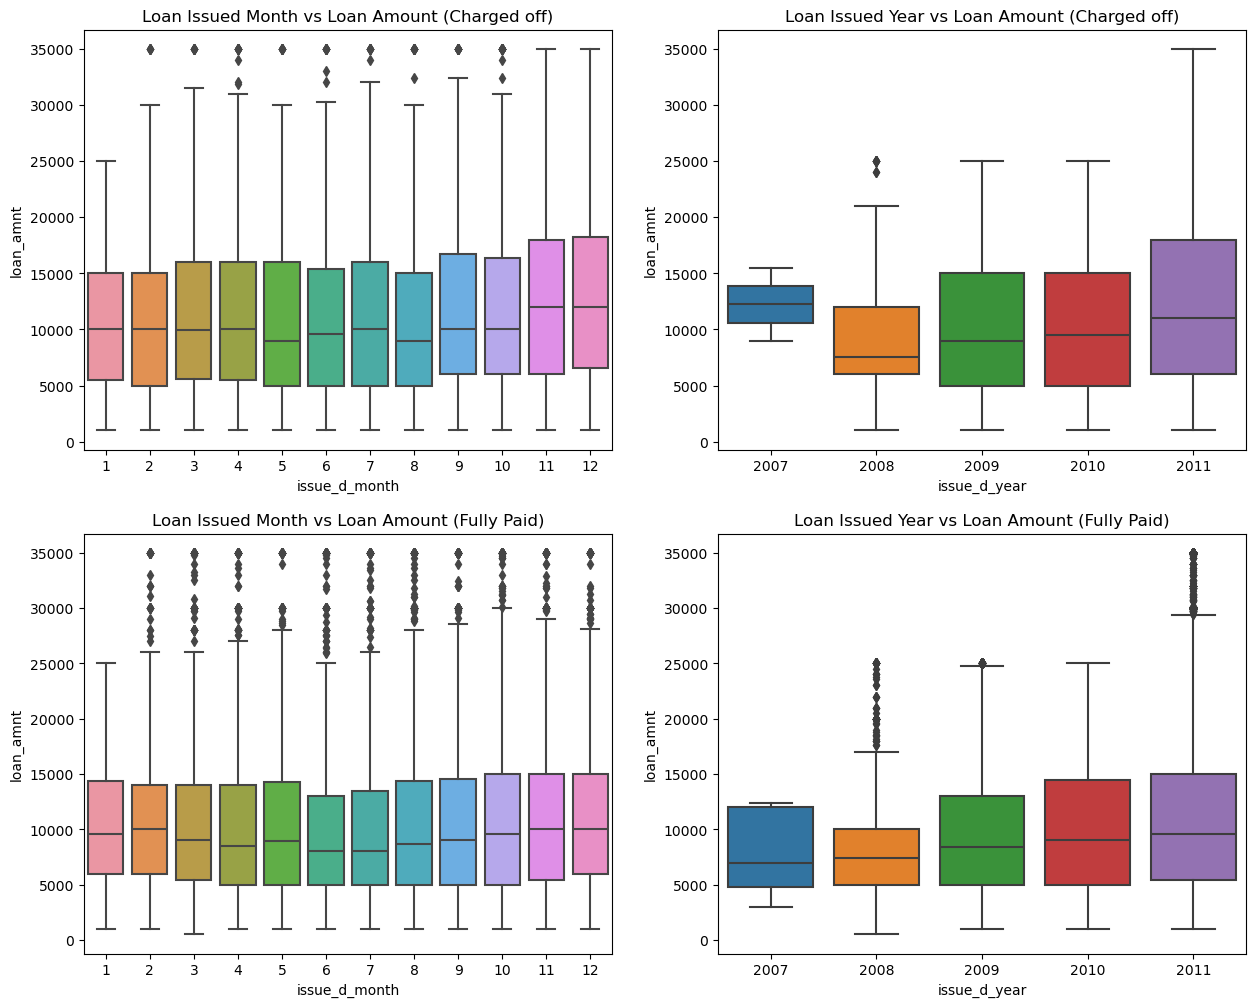

In [707]:
## Verification Status - Charged Off
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.boxplot(x='issue_d_month', y=filtered_data['loan_amnt'], data=filtered_data[filtered_data['loan_status']=='Charged Off'])
plt.title('Loan Issued Month vs Loan Amount (Charged off)')

## Home Ownership - Charged Off
plt.subplot(222)
sns.boxplot(x='issue_d_year', y=filtered_data['loan_amnt'], data=filtered_data[filtered_data['loan_status']=='Charged Off'])
plt.title('Loan Issued Year vs Loan Amount (Charged off)')

## Term - Fully Paid
plt.subplot(223)
sns.boxplot(x='issue_d_month', y=filtered_data['loan_amnt'], data=filtered_data[filtered_data['loan_status']=='Fully Paid'])
plt.title('Loan Issued Month vs Loan Amount (Fully Paid)')

## Grade - Fully Paid
plt.subplot(224)
sns.boxplot(x='issue_d_year', y=filtered_data['loan_amnt'], data=filtered_data[filtered_data['loan_status']=='Fully Paid'])
plt.title('Loan Issued Year vs Loan Amount (Fully Paid)')
plt.show()

**Observations:**
- Trend of issuing loan that are defaulted have grown significantly from 2007 - 2011.
- 4th Quarter of any year is where most of the loans (Charged off) were funded in LC.

## Analyzing Funded Amount

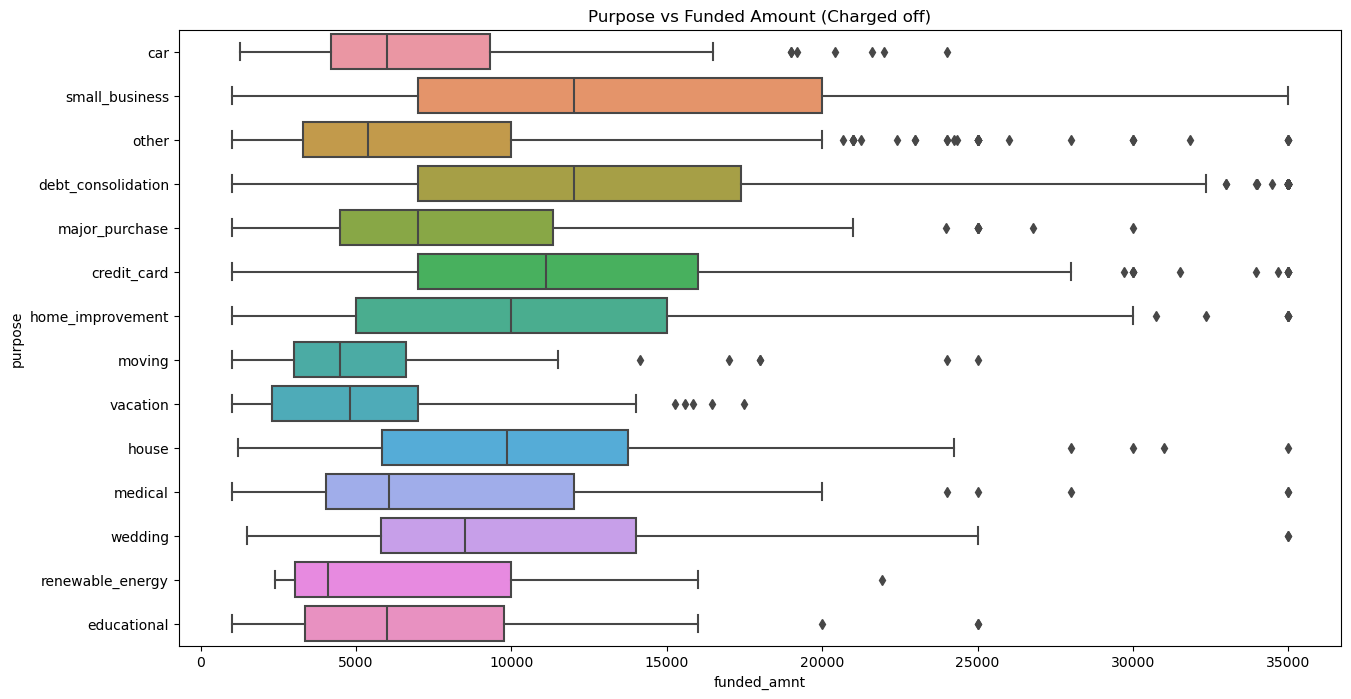

In [708]:
plt.figure(figsize=(15,8))
sns.boxplot(y='purpose', x=filtered_data['funded_amnt'], data=filtered_data[filtered_data['loan_status']=='Charged Off'])
plt.title('Purpose vs Funded Amount (Charged off)')
plt.show()

**Observations:**
- **Small business purpose loans have default the most**. LC should limit the loans offered to small businesses purpose or do more verifications

# Bivariate Analysis

 ## `Analysing Annual Income Vs Home Ownership`

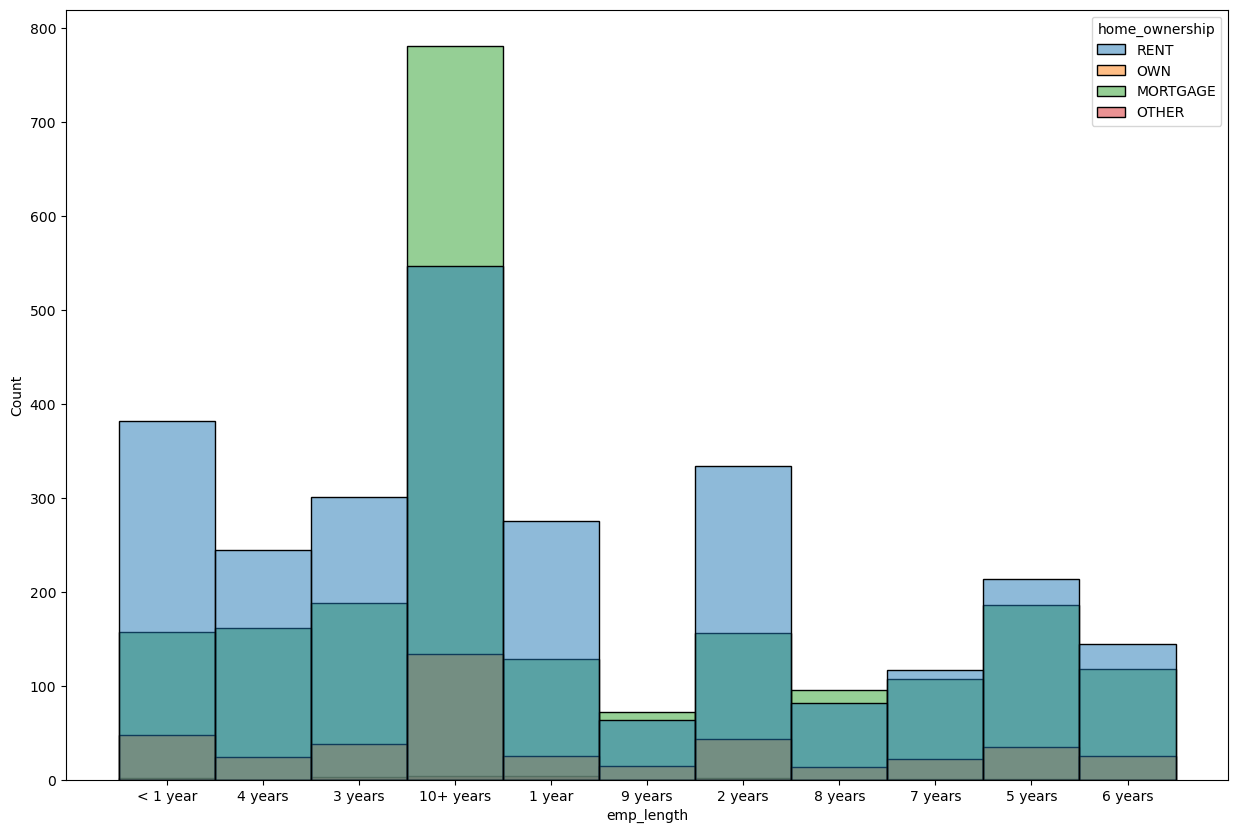

In [709]:
plt.figure(figsize=(15,10))
# sns.histplot(data=filtered_data, x='emp_length', hue='home_ownership')
sns.histplot(data=filtered_data[filtered_data['loan_status']=='Charged Off'], x='emp_length', hue='home_ownership')
plt.show()

**Observations:**
- Borrowers, with **all Experience type**, having Home ownership as **RENT** are the also the TOP defaulters.
- Borrowers with **>10 Years of experience** and having Home ownership as **MORTGAGE** are the second most defaulters.


 ## `Default Rate by Loan Purpose`

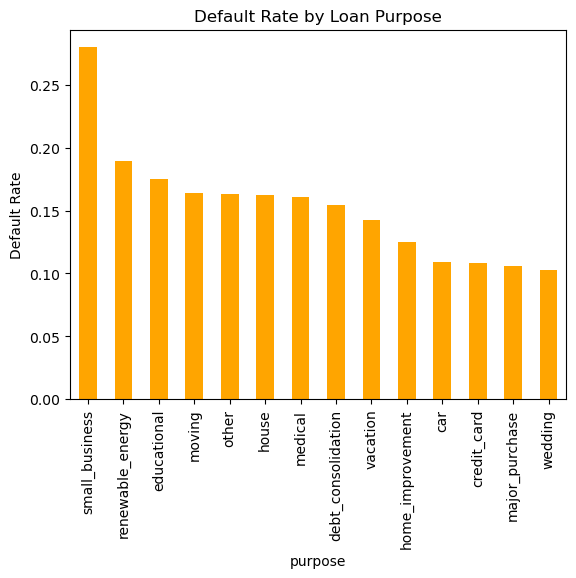

In [555]:
default_rates = filtered_data.groupby('purpose')['loan_status'].apply(lambda x: (x == 'Charged Off').mean())
default_rates.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("Default Rate by Loan Purpose")
plt.ylabel("Default Rate")
plt.xticks(rotation=90)
plt.show()

**Observtions**
- Small Businesses have defaulted the loans a lot more then other Loan purpose categories
- This is a strong indicator to consider borrowers who defaulted

 ## `Loan Status Vs Verification Status`

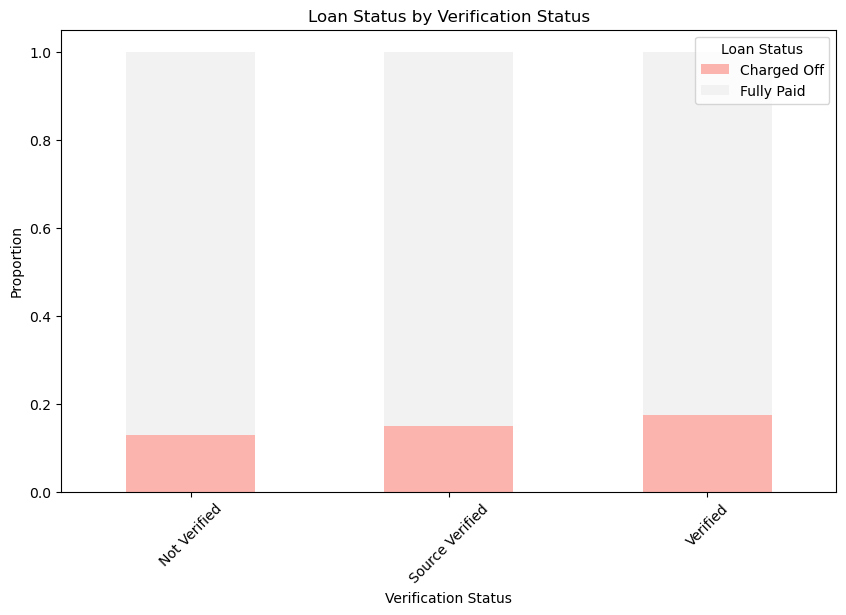

In [566]:
verification_status_by_loan = pd.crosstab(filtered_data['verification_status'], filtered_data['loan_status'], normalize='index')
verification_status_by_loan.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')
plt.title("Loan Status by Verification Status")
plt.ylabel("Proportion")
plt.xlabel("Verification Status")
plt.xticks(rotation=45)
plt.legend(title="Loan Status")
plt.show()

**Obsevation**
- Verification status is not a clear indicator of loan defaulters. As we can see, Verififed personnel are defaulting more then non-verified.

## `Loan Status Vs Interest Rate`

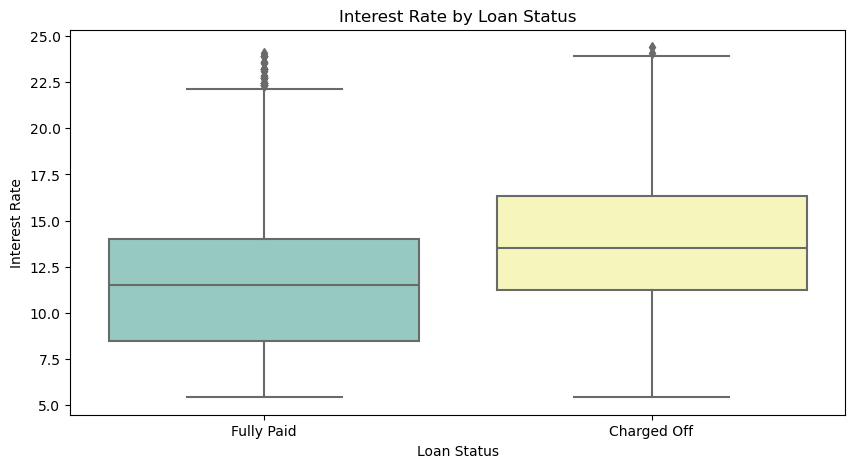

In [587]:
#Interest Rate vs Loan Status => highlighting higher interest rates for defaulted loans.
plt.figure(figsize=(10,5))
sns.boxplot(data=filtered_data, x='loan_status', y='int_rate', palette='Set3')
plt.title("Interest Rate by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Interest Rate")
plt.show()

Observations:
- It is observed that when interest rates are higher, defaulter percentile is also increased.

## `Funded Amount Vs Interest Rate`

<Figure size 1500x1000 with 0 Axes>

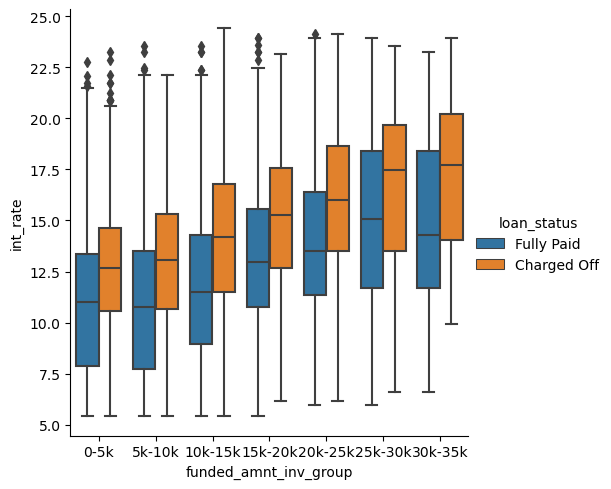

In [590]:
plt.figure(figsize=(15,10))
sns.catplot(data =filtered_data, y='int_rate', x='funded_amnt_inv_group', hue='loan_status', kind = 'box')
plt.show()

**Observations:**
- Higher interest rates are charged for higher loan amount resulting in loan defaulting

 ## `Analysing Annual Income Vs Loan Purpose`

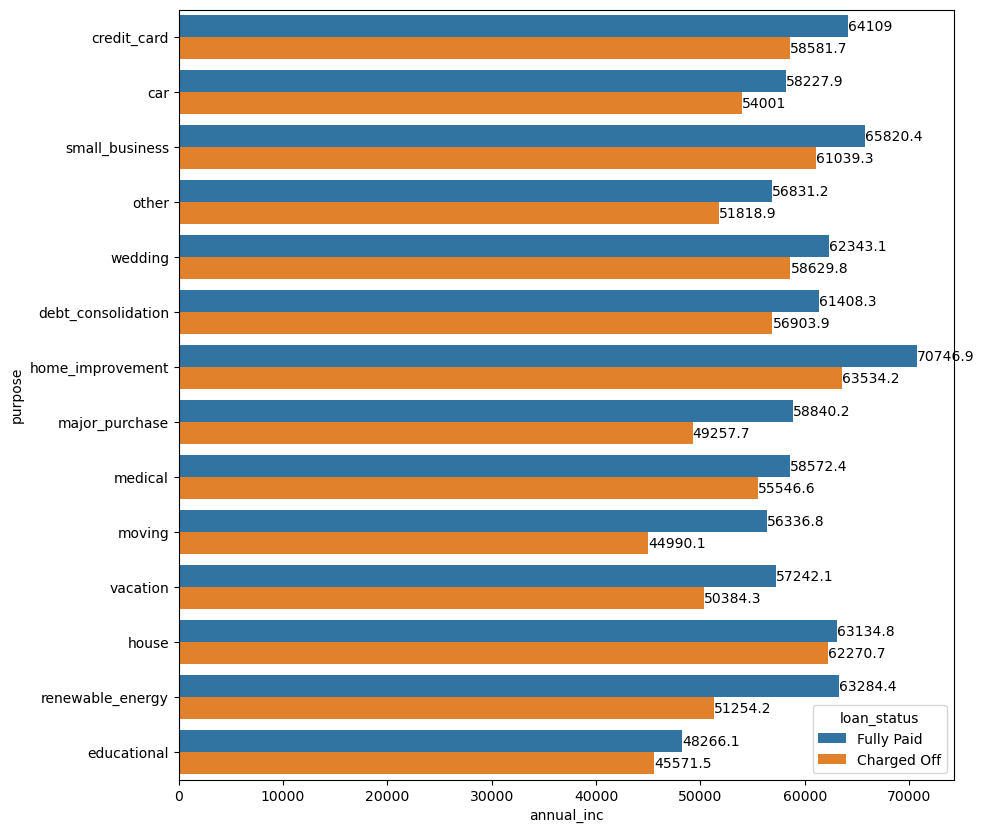

In [567]:
plt.figure(figsize=(10,10))
plot = sns.barplot(data =filtered_data,x='annual_inc', y='purpose', hue ='loan_status', ci=None)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.show()

##### Observations:
- Here, Annual incomes is a strong indicator in all Loan Purpose categories.
- Lower incomes borrowers are tend to default more
- Others category have significant amount of loan defaulters

 ## `Analysing Grade Vs Annual Income`

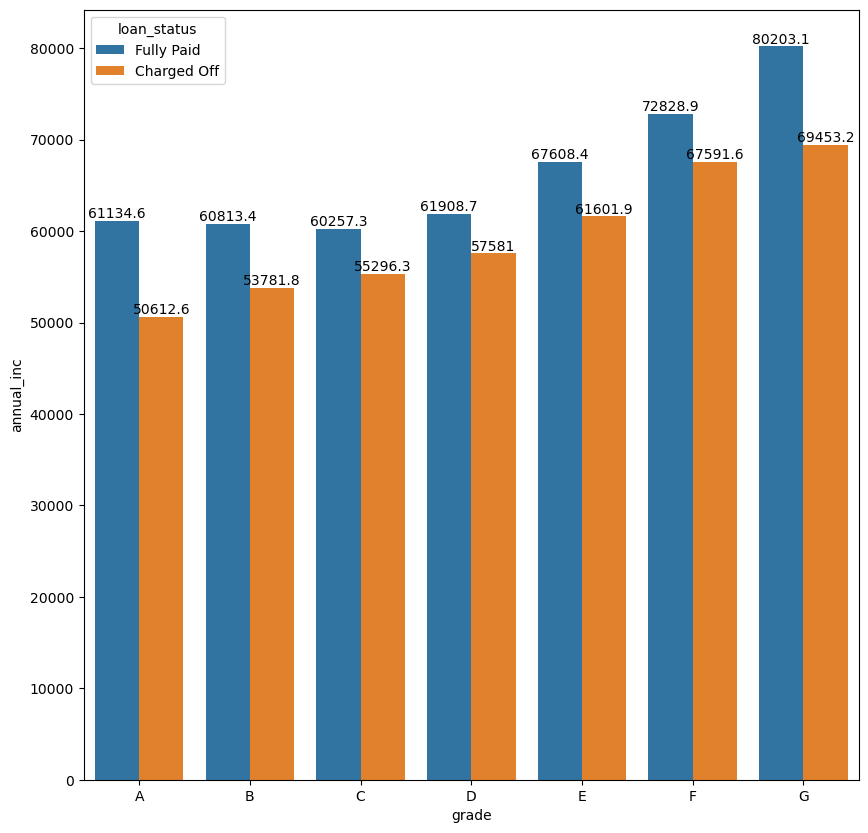

In [597]:
plt.figure(figsize=(10,10))
plot = sns.barplot(data =filtered_data,y='annual_inc', x='grade', hue ='loan_status', ci=None, order=['A','B','C','D','E','F','G'])
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.show()

**Observations:**
- Annual income of Grade E, F and G are higher then other Grade loans

 ## `Grade Vs Interest Rate`

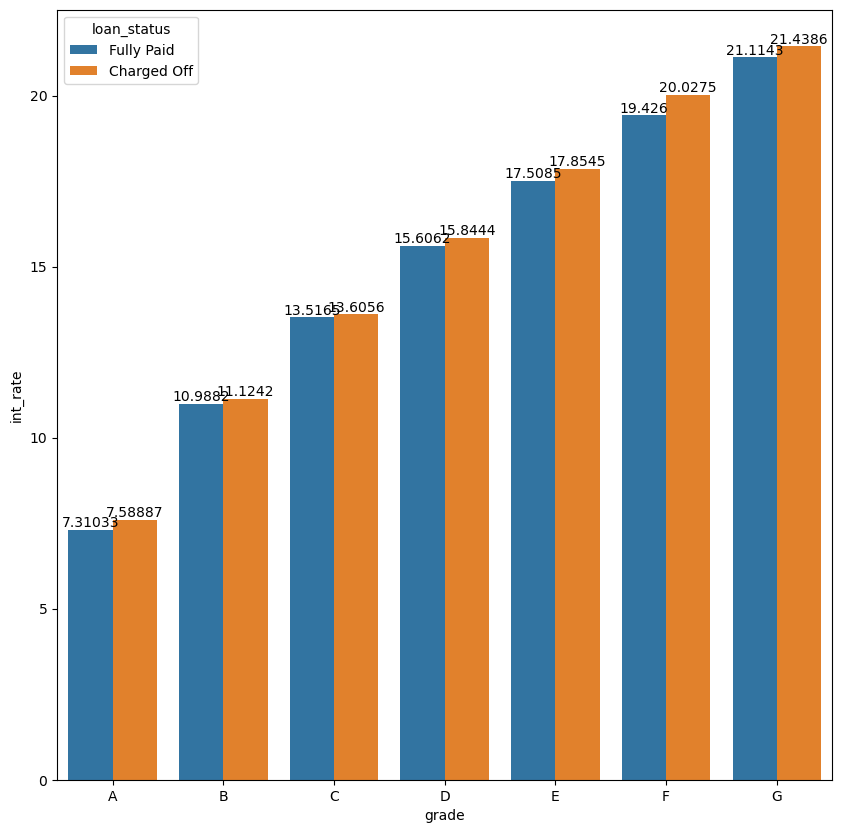

In [591]:
# plt.figure(figsize=(15,10))
# plot = sns.catplot(data =filtered_data, y='int_rate', x='grade', hue='loan_status', kind='bar', order=['A','B','C','D','E','F','G'], ci=None)
# plt.show()


plt.figure(figsize=(10,10))
plot = sns.barplot(data =filtered_data, y='int_rate', x='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'], ci=None)
plot.bar_label(plot.containers[0])
plot.bar_label(plot.containers[1])
plt.show()

**Observations:**

Grade are increasing and Interest rates are also increasing as well which is a stong reason for defaulting loans.

 ## `Correlation Analysis for All Data columns `

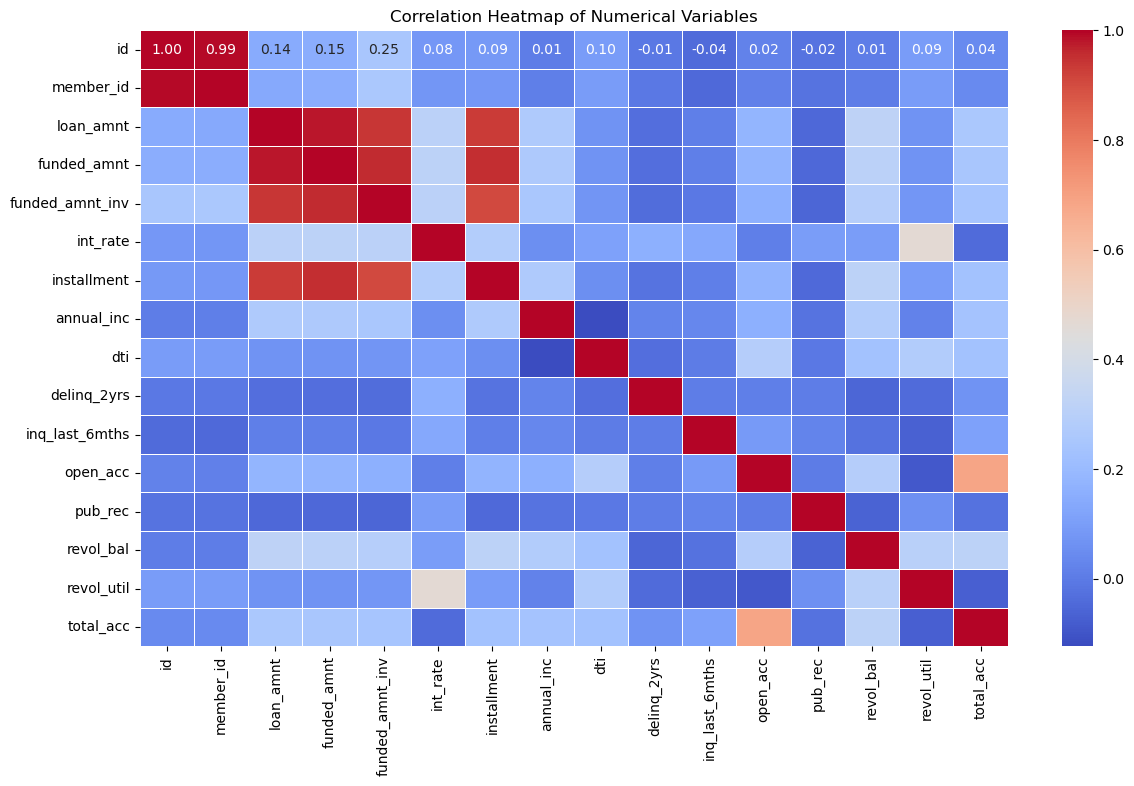

In [605]:
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Create a correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()